In [1]:
import pandas as pd
import texthero as hero
from texthero import preprocessing

In [2]:
#import os
#import sys
#sys.path.append('./nlplot-1.2.0/nlplot')
#import nlplot

In [3]:
df_names = pd.read_table('./protein_names.txt', header = None)
df_uniq_names = pd.read_table('./uniq_protein_names.txt', header = None)

In [4]:
custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                   , preprocessing.remove_digits
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_whitespace
                   , preprocessing.remove_stopwords # stopword
                  ]

In [5]:
names = hero.clean(df_names[0], custom_pipeline)
uniq_names = hero.clean(df_uniq_names[0], custom_pipeline)

In [6]:
words = [w for row in names.str.split(' ') for w in row if len(w) > 0]
uniq_words = [w for row in uniq_names.str.split(' ') for w in row if len(w) > 0]

<AxesSubplot:>

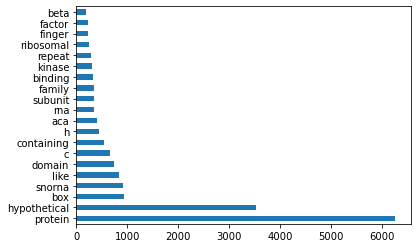

In [8]:
pd.Series(words).value_counts().head(20).plot(kind='barh')

<AxesSubplot:>

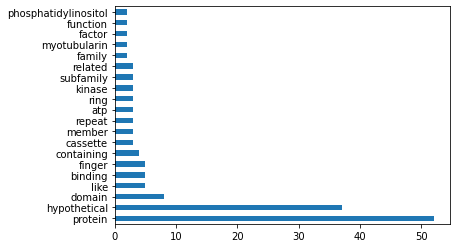

In [9]:
pd.Series(uniq_words).value_counts().head(20).plot(kind='barh')

In [10]:
from nltk.util import ngrams

def line_ngram(line, n=2):
    words = [w for w in line.split(' ') if len(w) != 0] # 空文字は取り除く
    return list(ngrams(words, n))

In [11]:
name_grams = names.map(line_ngram)
uniq_name_grams = uniq_names.map(line_ngram)

In [12]:
name_grams[0]

[('protein', 'unknown'), ('unknown', 'function'), ('function', 'duf2946')]

In [13]:
grams = [x for row in name_grams for x in row if len(x) > 0]
uniq_grams = [x for row in uniq_name_grams for x in row if len(x) > 0]

<AxesSubplot:>

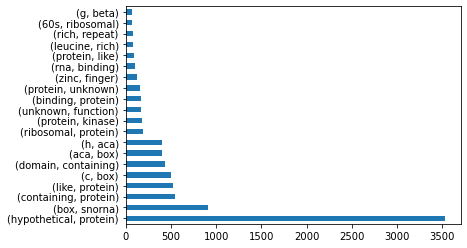

In [20]:
pd.Series(grams).value_counts().head(20).plot(kind='barh')

<AxesSubplot:>

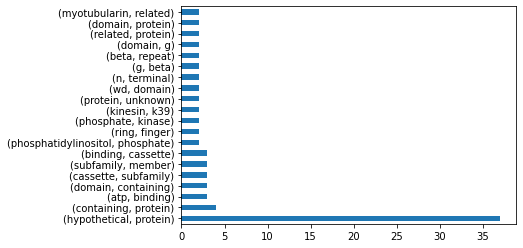

In [16]:
pd.Series(uniq_grams).value_counts().head(20).plot(kind='barh')